# Online Shop

## Research Details
- Create hypotheses with marketing team to boost income for online shop
- Prioritize hypotheses, with A/B testing, and analyze the results

<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Great!
    
It is more better if you define your research plan in this section.

</div>

## Prioritizing Hypothesis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
pd.options.display.max_colwidth = 200
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
orders = pd.read_csv('orders_us.csv', parse_dates=['date'])
visits = pd.read_csv('visits_us.csv', parse_dates=['date'])
hypothesis = pd.read_csv('hypotheses_us.csv', sep=';')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [5]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [6]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<div class="alert alert-success">
<b>Chamdani's comment v.1</b> <a class="tocSkip"></a>

Good, to make your project looks better you can put insight at every section in this project.

</div>

### Data Duplication Checkin

In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
hypothesis.duplicated().sum()

0

In [11]:
orders.duplicated().sum()

0

In [12]:
visits.duplicated().sum()

0

### Early Conclusion  1

- No data duplication
- All the data type is as aspected to be anlyse further
- There is a column name that needed to be change in order to smoothened the analyzing proccess 

### Change columns name

In [4]:
orders.rename(columns ={'transactionId' : 'transaction_id','visitorId': 'visitor_id'}, inplace=True)
hypothesis.columns = hypothesis.columns.str.lower()

In [5]:
hypothesis

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### Using ICE and RICE framework methode

In [6]:
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['effort']
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['effort']

# Ice Framework

- Impact (dampak), confidence (keyakinan), effort (usaha)/ease (kemudahan), atau disingkat ICE. Merupakan merode yang di pakai dalam bab ini

In [7]:
hypothesis.sort_values('ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


# RICE framework

- Dengan menggunakan Reach,Impact,Confidence,Effort untuk memperlihatkan score untuk menguji hypothesis

In [17]:
hypothesis.sort_values('RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


### Early Conclusion 2

- There is a different between two framework hypothesis that had been presented
- ICE give us top 5 conclusion, which is number 8, 0, 7, 6, and 2
    1. It is because Impact factor that, how strong is influencing user, their experience, and their sattisfaction toward the product.
    2. Confidence factor, where on how confidence company product will influence user with the presented methode.
    3. Effort factor, where you can budget the hyphothesis testing.
    
- RICE give us different top 5 conclusion , which is 7, 2, 0, 6, 8
    1. Because in this frame work there is one factor that be inputed to the equation. That is Reach Factor.
    2. Reach factor tell us on how many user that influenced by the update that have been given

## A/B Testing Analysis

In [8]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [9]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Checking the total visit and revenue

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transaction_id' : pd.Series.nunique,
    'visitor_id' : pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitor_id']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitor_id
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [12]:
ordersAggregated.sort_values('date')

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,2356.8
66,2019-08-01,B,21,20,1620.0
175,2019-08-02,A,44,38,3860.3
173,2019-08-02,B,45,43,4243.8
291,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
496,2019-08-29,B,596,544,87343.0
730,2019-08-30,A,545,493,63563.5
690,2019-08-30,B,620,567,90736.3
958,2019-08-31,A,557,503,64554.9


### Revenue Break Down

In [13]:
orders.sort_values('revenue')

,transaction_id,visitor_id,date,revenue,group
1003,2765619353,54447517,2019-08-08,5.0,A
602,2356264591,1224903511,2019-08-09,5.1,A
404,2052514069,1995481842,2019-08-28,5.1,B
307,1404959653,3896738923,2019-08-18,5.2,A
390,2415738512,2038680547,2019-08-25,5.2,A
...,...,...,...,...,...
744,3668308183,888512513,2019-08-27,1335.6,B
1136,666610489,1307669133,2019-08-13,1425.8,A
858,192721366,1316129916,2019-08-27,1450.2,A
1196,3936777065,2108080724,2019-08-15,3120.1,B


### Group and Visits breakdown

In [14]:
ordersAggregated.sort_values('group')

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,2356.8
1150,2019-08-14,A,268,247,29910.8
2,2019-08-15,A,283,259,31319.0
958,2019-08-31,A,557,503,64554.9
124,2019-08-17,A,311,283,33723.6
...,...,...,...,...,...
315,2019-08-19,B,403,377,64546.6
360,2019-08-06,B,129,123,13069.3
539,2019-08-20,B,423,396,66871.2
47,2019-08-16,B,359,336,40155.3


In [15]:
visitorsAggregated.sort_values('date')

,date,group,visits
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [16]:
print(orders['date'].min())
print(orders['date'].max())
print(len(orders))

2019-08-01 00:00:00
2019-08-31 00:00:00
1197


### Cummulative grouping

In [17]:
cumulativeData_a = cumulativeData.loc[cumulativeData['group'] == 'A'].sort_values('date')
cumulativeData_a.head()


,date,group,orders,buyers,revenue,visitor_id
0,2019-08-01,A,24,20,2356.8,719
2,2019-08-02,A,44,38,3860.3,1338
4,2019-08-03,A,68,62,5675.5,1845
6,2019-08-04,A,84,77,6822.1,2562
8,2019-08-05,A,109,100,8810.2,3318


In [18]:
cumulativeData_b = cumulativeData.loc[cumulativeData['group'] == 'B'].sort_values('date')
cumulativeData_b.head()

,date,group,orders,buyers,revenue,visitor_id
1,2019-08-01,B,21,20,1620.0,713
3,2019-08-02,B,45,43,4243.8,1294
5,2019-08-03,B,61,59,6050.6,1803
7,2019-08-04,B,78,75,7767.9,2573
9,2019-08-05,B,101,98,9262.9,3280


## Acummulating revenue plotting by group

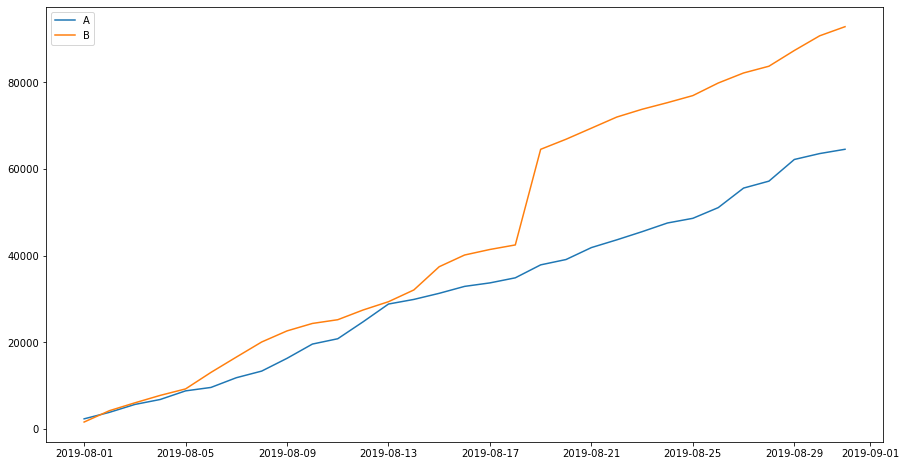

In [19]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize =(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()

### Early conclusion 3

- There is a considerable increase of revenue at 17th of august 2019 from group B. But both the same group have increase in revenue at the same pace 

# Acumulating average order size and relative difference 

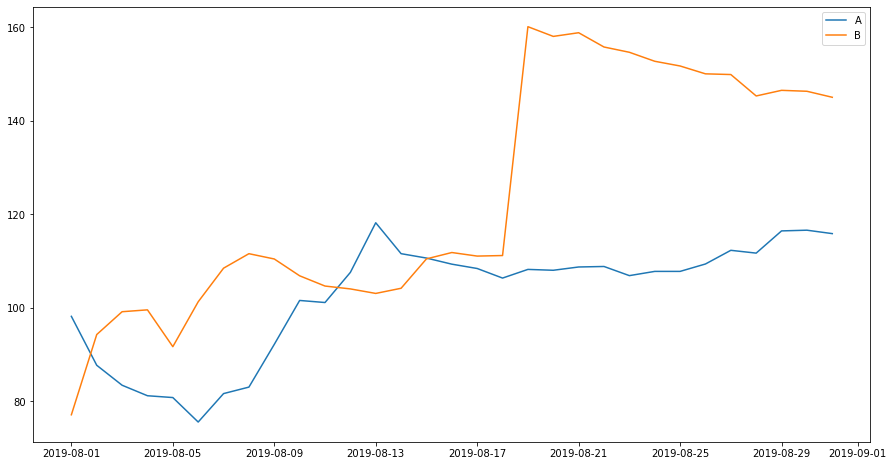

In [20]:
plt.figure(figsize =(15,8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()

### Early conclusion 4

- Group B have surge in revenue as we can see in cummulative revenue. Both group bring revenue and group A bring more revenue in 13 of august. Group B as earlier graph we can conclude much more order size while still in normal status.

## Average cumulative difference A/B 

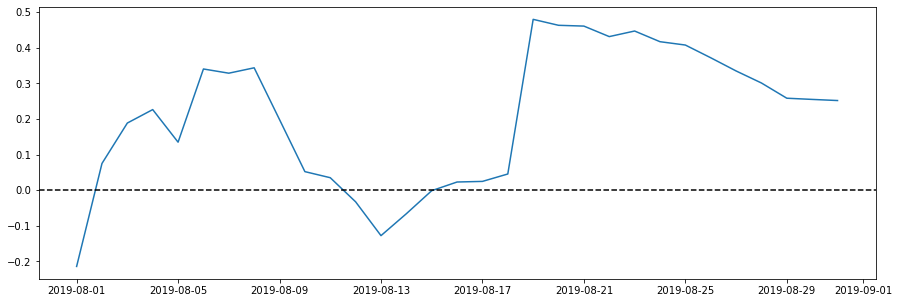

In [21]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize =(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

In [22]:
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2356.8,24,1620.0,21
1,2019-08-02,3860.3,44,4243.8,45
2,2019-08-03,5675.5,68,6050.6,61
3,2019-08-04,6822.1,84,7767.9,78
4,2019-08-05,8810.2,109,9262.9,101


## Calculating convertion by group as a ratio order by day 

In [23]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitor_id']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitor_id,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856


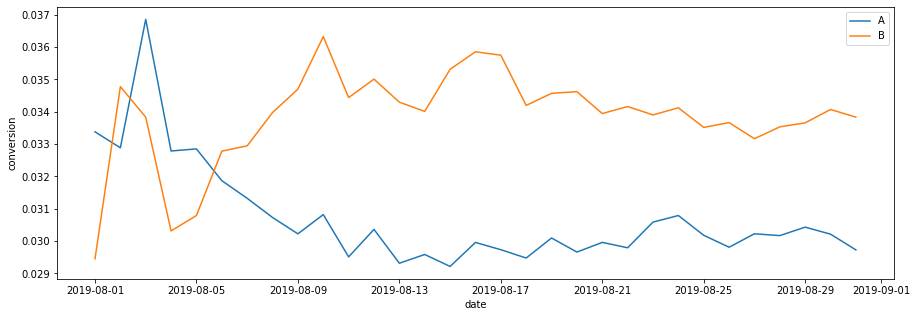

In [24]:
plt.figure(figsize =(15,5))
sns.lineplot(data=cumulativeData, x=cumulativeData['date'], y=cumulativeData['conversion'], hue='group');
plt.legend()
plt.show()

### Early conclusion 5

- Group B starts not as much ratio as group A at the begining of the month of august. And at the 5 of december it shows that group B surge and stay at the 0.034 point.

## Annalyzing Anomalies with scatter plot

In [25]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

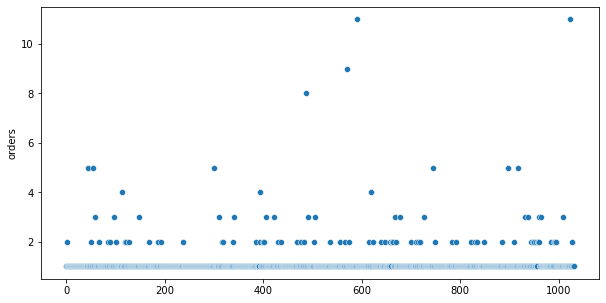

In [28]:
plt.figure(figsize =(10,5))
sns.scatterplot(x_values, ordersByUsers['orders']) 
plt.show()

### Calculate percentile 95th and 99th order per user which determind data point transformed become anomalies

In [29]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

### Early Conclusion 6

- In the scatter plot there is an outlier where user order more then 10 times and there is a user habit that buy 2 or 3 times in the designated timeframe.
- 5 percent of the user order more then 2 times, user that order more then 4 times only 1 percent. It is concider an anomaly if user made more then 3 orders.

## Scatter Chart for abnormaly expensive orders

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  19920.4     B
1196      3936777065  2108080724 2019-08-15   3120.1     B
858        192721366  1316129916 2019-08-27   1450.2     A
1136       666610489  1307669133 2019-08-13   1425.8     A
744       3668308183   888512513 2019-08-27   1335.6     B
662       1811671147  4266935830 2019-08-29   1220.2     A
682       1216533772  4266935830 2019-08-29   1220.2     B
743       3603576309  4133034833 2019-08-09   1050.0     A
1103      1348774318  1164614297 2019-08-12   1025.8     A
1099       316924019   148427295 2019-08-12   1015.9     A


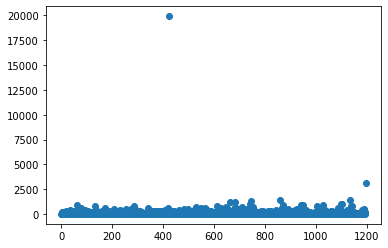

In [30]:
print(orders.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

### Early conlucison 7 

- There is an 20000 dollar order which we can consider an abnormal expensive order
- From the scatter plot we can see clearly there is a 2 outlier

(0.0, 1210.0, 0.0, 1500.0)

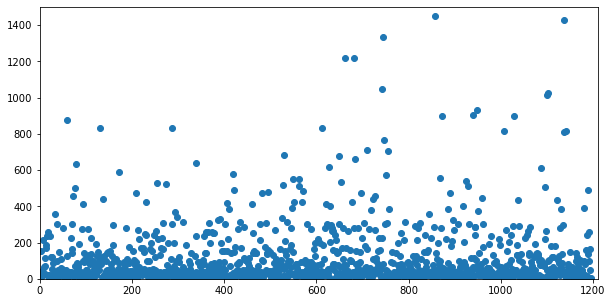

In [31]:
plt.figure(figsize =(10,5))
plt.scatter(x_values, orders['revenue'])
plt.axis([0, 1210, 0, 1500])

In [32]:
np.percentile(orders['revenue'], [90, 95,99])

array([282.48 , 435.54 , 900.904])

### Early Conclusion 8

- We can conclude that revenue gain is at 200 and 400 dollars at most 
- order that generated revenue more then 800 dollars is only 1 percent 
- As expected regular orders 1 - 5 percent is generating revenue the most 

# Calculating statistical significance using raw data

## Conversion

In [33]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


0.01679
0.138


In [34]:
len(sampleA), len(sampleB)

(18736, 18916)

In [35]:
alpha = 0.05 #signifikansi 

results = stats.mannwhitneyu(sampleA, sampleB)
print('p_value:',results.pvalue)


p_value: 0.016792355056752608


In [36]:
if (results.pvalue < alpha):
    print('Zero hyputhesis rejected: There is statistical significance difference between sample A and Sample B')
else:
    print('Zero hypothesis accepted : There is no statistical significance difference between sample A and Sample B')


Zero hyputhesis rejected: There is statistical significance difference between sample A and Sample B


### Early Conclusion 9

- Convesion in group B is greater then group A by 0.138 which mean 13.8 percent 
- By running p value hypothesis it is assuring that there is statistical difference between Sample A and Sample B


## Order Size 

In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.692
0.252


### Early conclusion 10

-  There is a 43 % percent increase between Group B and Group A in order that lead to revenue 

## Calculating filtered statistical significance between Group 

### Collecting User with different variables 

In [38]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id']], axis = 0)
usersWithManyOrders.head()

18      199603092
23      237748145
68      611059232
146    1230306981
189    1614305549
Name: visitor_id, dtype: int64

In [39]:
usersWithExpensiveOrders = orders[orders['revenue'] > 430]['visitor_id']
usersWithExpensiveOrders.head()

60     4256040402
73     2947100995
77      787824685
78     3288820196
131    2254586615
Name: visitor_id, dtype: int64

In [40]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64

In [41]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18228    0
18229    0
18230    0
18231    0
18232    0
Name: orders, Length: 18690, dtype: int64

In [42]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)
sampleBFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18325    0
18326    0
18327    0
18328    0
18329    0
Name: orders, Length: 18868, dtype: int64

In [43]:
alpha = 0.05 

filtered = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)
print('p_value:',filtered.pvalue)

p_value: 0.01417823754717904


In [44]:
sampleAFiltered.mean()

0.02530765115034778

In [45]:
sampleBFiltered.mean()

0.02962688149247403

In [46]:
#Difference pvalue and filltered pvalue
results.pvalue - filtered.pvalue

0.0026141175095735682

In [47]:
if (filtered.pvalue < alpha):
    print('Zero hyputhesis rejected: There is statistical significance difference between sample A and Sample B')
else:
    print('Zero hyputhesis rejected: There is no statistical significance difference between sample A and Sample B')

Zero hyputhesis rejected: There is statistical significance difference between sample A and Sample B


### Early conclusion 11

- There is 0.7 percent outlier data intersect with the which lead to rejected hypothesis
- Group B generate revenue by order with 17.1 dollar more then group A

## Finding statistic significance average order between group with filtered data

In [48]:
ordersA = orders[(orders['group'] == 'A') & ~(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['revenue']
ordersA

2       10.2
7       20.1
8      215.9
10      65.7
12     115.4
       ...  
493    135.1
495    160.8
497     40.3
500     20.8
502      5.9
Name: revenue, Length: 214, dtype: float64

In [49]:
ordersB = orders[(orders['group'] == 'B') & ~(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['revenue']
ordersB

0       30.4
1       15.2
3      155.1
4       40.5
5       35.0
       ...  
576    105.3
577     45.1
581     90.1
583     10.3
585     65.7
Name: revenue, Length: 287, dtype: float64

In [50]:
alpha = 0.05 #significant

avg_filtered = stats.mannwhitneyu(ordersA, ordersB)
print('p_value:',avg_filtered.pvalue)

p_value: 0.2566970534990096


In [51]:
ordersA.sum()

19678.399999999998

In [52]:
ordersB.sum()

50687.1

In [53]:
(ordersB.sum() - ordersA.sum())/ordersA.sum()


1.575773436864786

In [54]:
if (avg_filtered.pvalue < alpha):
    print('Zero hyputhesis rejected: There is statistical significance difference between sample A and Sample B')
else:
    print('Zero hyputhesis rejected: There is no statistical significance difference between sample A and Sample B')

Zero hyputhesis rejected: There is no statistical significance difference between sample A and Sample B


### Early conclusin 12

- We can find effect of anomolus order effecting the test result
- There is surge between group A and Group B in revenue as much as 150 %

# Conclusion

### Findings

- In the middle of the month on 2019-08-13, the analysis on the line chart above shows fluctuations in group b, but group B has managed to rise and there has also been a spike due to the presence of large and expensive orders, and at the end of the test the line chart shows stable chart. however, group A also recorded an increase in income and experienced fluctuations at the start of the test.
- Hypothesis for the average order size between groups using raw data and filtered data also shows that we accept the null hypothesis which means that there is no difference in the average order size between group a and group b, and also outliers in the raw data does not affect the results of hypothesis testing. although the results show that the average order size of group a and group b is the same, but if you look at the total order size between groups, group B leads with a high total order size of around 50687.1 dollars and sample a as much as 19678.39 dollars, which is where there is an increase in income of 150 percent from sample A to sample B.
- There is no statistical difference data in raw and filtered average order signigicance 
- Ther is a statisical difference in conversion between two groups in filltered and raw data 

### Recommendation

- Launch your own delivery service. This will shorten delivery time
- Add a customer review page. This will increase the number of orders
- Add two new channels for attracting traffic. This will bring 30% more users  
- Change the category structure. This will increase conversion since users will find the products they want more quickly
- Create event to be closer to user
- Have a partnership in media
- Strategic partnership with influencer
- Create your own server 
- Promo and discount for the marketing team
